Nama: Naufal Hilmi Fathul Ihsan

NIM : 5312422039

Jobsheet 5 - FIR & IIR Filter 1

# **FIR_and_IIR_Filter_Design**

Kode berkut ini digunakan untuk mengimpor modul-modul yang diperlukan untuk bekerja dengan sinyal dan filter dalam lingkungan Jupyter Notebook atau IPython. Ini termasuk modul untuk mendesain filter FIR dan IIR, memproses sinyal multirate, serta modul untuk menampilkan gambar dan audio di notebook. Berikut kode yang digunakan :

In [52]:
%pylab inline
#%pylab notebook # for plots editable inthe notebook
#%matplotlib qt # for popout plots
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [53]:
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

Perintah ini mengonfigurasi backend inline untuk menampilkan gambar dalam format SVG di Jupyter Notebook. Ini memungkinkan untuk melihat gambar dalam format vektor yang lebih halus dan skalabel langsung di dalam notebook.

# **Filter Design Using the Helper Modules**

 Penjalasan tentang cara menggunakan modul bantuan untuk merancang filter FIR dan IIR dalam paket scikit-dsp-comm. Daripada menggunakan fungsi-fungsi dari paket scipy.signal, modul bantuan ini menawarkan antarmuka yang lebih sederhana dan konsisten untuk merancang filter FIR dan IIR dengan baik.

Dalam penjelasan ini, kita mengasumsikan bahwa kita telah mengimpor modul bantuan sebagai berikut:

In [54]:
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d

Fungsi-fungsi di dalam modul-modul ini membungkus fungsi-fungsi scipy.signal dan juga menambahkan fungsionalitas baru yang berguna untuk merancang filter.

Jadi, penggunaan modul ini memudahkan dan memperkaya proses merancang filter FIR dan IIR, baik yang memiliki respon impuls terbatas (FIR) maupun yang memiliki respon impuls tak terbatas (IIR), dengan memastikan konsistensi antara berbagai desain dan menyediakan antarmuka yang lebih ramah pengguna.

# **Design From Amplitude Response Requirements**

kode berikut untuk mengimpor beberapa modul yang berguna untuk merancang filter digital dan menampilkan hasilnya

In [56]:
%pylab inline

import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG


Populating the interactive namespace from numpy and matplotlib


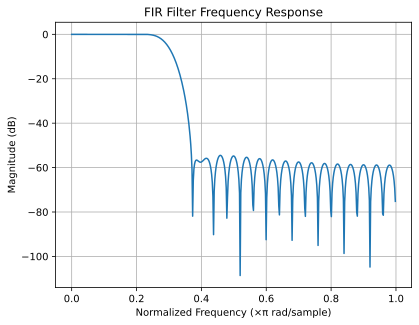

In [59]:
import scipy.signal as signal

# Desain filter FIR low-pass menggunakan scipy
fir_coeffs = signal.firwin(numtaps=50, cutoff=0.3, window='hamming')

# Plot respons frekuensi filter FIR
w, h = signal.freqz(fir_coeffs)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title('FIR Filter Frequency Response')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()


 kode tersebut merancang filter FIR (Finite Impulse Response) menggunakan metode firwin dari modul 'scipy.signal'. Filter ini merupakan filter low-pass dengan jumlah 'numtaps' sebanyak 50 dan frekuensi cut-off sebesar 0.3. Filter tersebut menggunakan jendela Hamming.

Setelah merancang filter, kode tersebut kemudian menghitung respons frekuensi filter FIR menggunakan fungsi 'freqz' dari modul 'scipy.signal'. Hasil respons frekuensi kemudian dipetakan dalam plot dengan sumbu x direpresentasikan dalam frekuensi ter-normalisasi dan sumbu y dalam magnitudo dalam skala desibel (dB).

Setelah menyiapkan plot, plot tersebut ditampilkan menggunakan fungsi 'plt.show()'. Dengan demikian, kode tersebut menghasilkan plot respons frekuensi dari filter FIR yang telah dirancang.

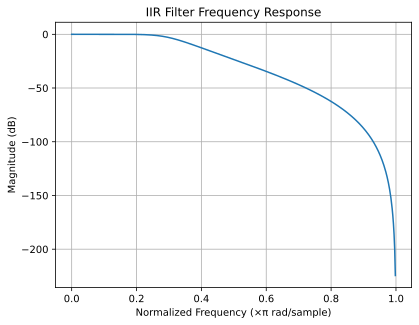

In [60]:
import scipy.signal as signal

# Desain filter IIR Butterworth low-pass menggunakan scipy
iir_b, iir_a = signal.iirfilter(N=4, Wn=0.3, btype='low', ftype='butter', output='ba')

# Plot respons frekuensi filter IIR
w, h = signal.freqz(iir_b, iir_a)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title('IIR Filter Frequency Response')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()


Kode tersebut merancang dan memplot respons frekuensi dari filter IIR Butterworth low-pass dengan orde 4 dan frekuensi cut-off sebesar 0.3.








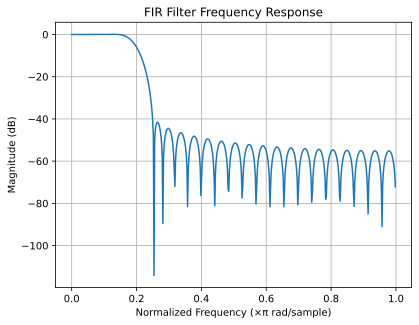

In [61]:
# Desain filter FIR low-pass
N, beta = signal.kaiserord(ripple=40, width=0.1)
fir_coeffs = signal.firwin(N, cutoff=0.2, window=('kaiser', beta), pass_zero=True)

# Plot respons frekuensi filter FIR
w, h = signal.freqz(fir_coeffs)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title('FIR Filter Frequency Response')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()


Kode tersebut merancang dan memplot respons frekuensi dari filter FIR low-pass menggunakan metode Kaiser. Filter tersebut memiliki order yang dihitung dengan menggunakan 'kaiserord' dengan nilai ripple sebesar 40 dB dan lebar pita relatif sebesar 0.1.

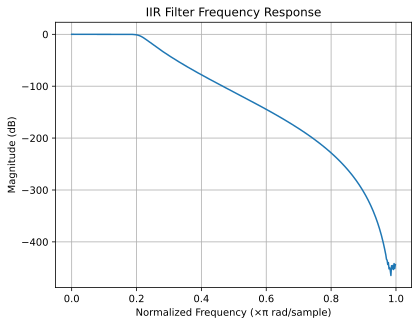

In [62]:
# Desain filter IIR Butterworth low-pass
order, wn = signal.buttord(wp=0.2, ws=0.3, gpass=1, gstop=40, analog=False)
iir_b, iir_a = signal.butter(N=order, Wn=wn, btype='low', analog=False, output='ba')

# Plot respons frekuensi filter IIR
w, h = signal.freqz(iir_b, iir_a)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title('IIR Filter Frequency Response')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()


Kode tersebut merancang dan memplot respons frekuensi dari filter IIR Butterworth low-pass. Filter ini memiliki orde yang dihitung menggunakan buttord dengan spesifikasi frekuensi cut-off dan karakteristik redaman.

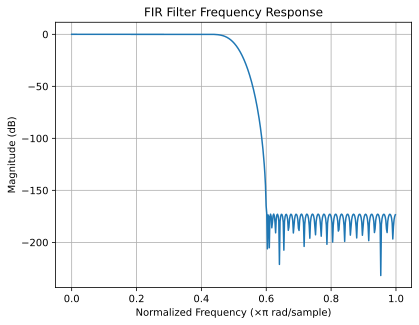

In [64]:
import scipy.signal as signal

# Desain filter FIR low-pass menggunakan scipy
numtaps = 101
fir_coeffs = signal.remez(numtaps, [0, 0.2, 0.3, 0.5], [1, 0], weight=[1, 40])

# Plot respons frekuensi filter FIR
w, h = signal.freqz(fir_coeffs)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title('FIR Filter Frequency Response')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()


Kode tersebut merancang dan memplot respons frekuensi dari filter FIR low-pass menggunakan metode Remez dengan panjang tap sebanyak 101. Setelah merancang filter, plot menampilkan respons frekuensi filter FIR tersebut.

# **Linear Phase FIR Filter Design**

In [65]:
from IPython.display import Image

Image(url='D:/PSD/11222.png')


Terdapat 10 fungsi desain filter dan satu fungsi plotting yang tersedia di fir_design_helper.py. Empat fungsi untuk mendesain filter FIR berbasis jendela Kaiser dan empat fungsi untuk mendesain filter FIR berbasis equiripple. Dari delapan fungsi yang baru saja dijelaskan, semuanya menerima persyaratan respons amplitudo dan mengembalikan array koefisien. Dua dari 10 fungsi filter hanyalah pembungkus di sekitar fungsi scipy.signal signal.firwin() untuk mendesain filter dengan urutan tertentu ketika satu (lowpass) atau dua (bandpass) frekuensi kritis diberikan. Fungsi pembungkus memperbaiki jenis jendela ke firwin default hann (hanning). Delapan remamining dijelaskan di bawah ini pada Tabel 1. Fungsi plotting menyediakan cara yang mudah untuk membandingkan respons frekuensi yang dihasilkan dari satu atau lebih desain pada satu plot. Mode tampilan memungkinkan penguatan dalam dB, fase dalam radian, penundaan grup dalam sampel, dan penundaan grup dalam detik untuk laju sampling tertentu. Fungsi ini, freq_resp_list(), berfungsi untuk desain FIR dan IIR. Tabel 1 memberikan detail antarmuka ke delapan fungsi desain di mana d_stop dan d_pass adalah nilai dB positif dan frekuensi kritis memiliki unit yang sama dengan frekuensi sampling fs
 . Fungsi-fungsi ini tidak menghasilkan hasil yang sempurna sehingga beberapa penyetelan parameter desain mungkin diperlukan, selain menabrak urutan filter ke atas atau ke bawah melalui N_bump.



In [66]:
from IPython.display import Image

Image(url='D:/PSD/2.png')


FIR Filter Design Functions

# **Design Examples**

Example 1: Lowpass with  fs=1

Untuk filter dengan 31 tap ini, kita memilih frekuensi cutoff menjadi Fc=Fs/8 , atau dalam bentuk ter-normalisasi fc=1/8.

In [67]:
b_k = fir_d.firwin_kaiser_lpf(1/8, 1/6, 50, 1.0)
b_r = fir_d.fir_remez_lpf(1/8, 1/6, 0.2, 50, 1.0)


Di sini menggunakan dua metode berbeda untuk mendesain filter FIR lowpass dengan frekuensi cutoff pada 1/8 dari frekuensi sampling (1 Hz) dengan panjang filter 31 tap:

firwin_kaiser_lpf: Menggunakan metode Kaiser window untuk desain filter FIR.

fir_remez_lpf: Menggunakan metode Remez (Parks-McClellan) untuk desain filter FIR.

 Berikut ini kode digunakan untuk memplot respons frekuensi dari kedua filter FIR yang sudah di rancang (menggunakan metode Kaiser dan metode Equal Ripple) dalam dB

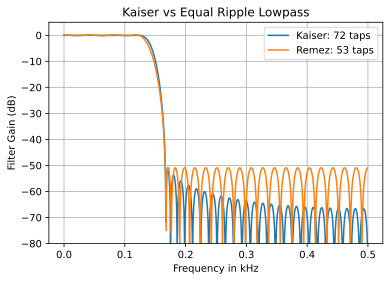

In [68]:
fir_d.freqz_resp_list([b_k,b_r],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

Perintah ini memanggil fungsi freqz_resp_list dari modul fir_design_helper untuk memplot respons frekuensi dari kedua filter FIR yang telah di rancang, kemudian menyesuaikan batas sumbu y, judul, label sumbu x dan y, serta menambahkan legenda dan grid. Ini akan menghasilkan plot yang membandingkan respons frekuensi dari kedua filter dengan panjang tap yang berbeda seperti gambar plot diatas

menggunakan fungsi firwin_kaiser_hpf dan fir_remez_hpf untuk merancang filter FIR high-pass. Di bawah ini adalah kode lengkapnya:

In [69]:
b_k_hp = fir_d.firwin_kaiser_hpf(1/8,1/6,50,1.0)
b_r_hp = fir_d.fir_remez_hpf(1/8,1/6,0.2,50,1.0)

Dalam kedua kasus tersebut, Anda telah meminta filter dengan frekuensi cutoff pada 1/8 dari frekuensi sampling, riak passband sebesar 1/6, dan panjang filter maksimum 50. Panjang filter yang dihasilkan akan bervariasi tergantung pada metode yang digunakan.

Sama seperti sebelumnya, Anda dapat memplot respons frekuensi dari kedua filter FIR yang Anda rancang dengan menggunakan fungsi fir_d.freqz_resp_list. Jika ada pertanyaan lebih lanjut, jangan ragu untuk bertanya!

Lalu menggunakan fungsi fir_d.freqz_resp_list untuk memplot respons frekuensi dari kedua filter FIR high-pass itu (menggunakan metode Kaiser dan metode Equal Ripple) dalam dB. Di bawah ini adalah kode lengkapnya:

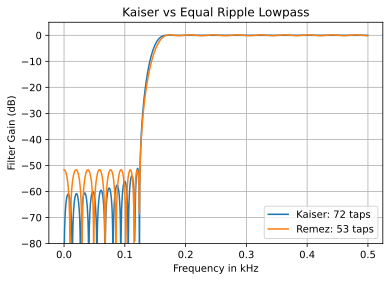

In [70]:
fir_d.freqz_resp_list([b_k_hp,b_r_hp],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

Perintah ini memanggil fungsi freqz_resp_list dari modul fir_design_helper untuk memplot respons frekuensi dari kedua filter FIR high-pass yang sudah di rancang, kemudian menyesuaikan batas sumbu y, judul, label sumbu x dan y, serta menambahkan legenda dan grid.

Ini akan menghasilkan plot yang membandingkan respons frekuensi dari kedua filter dengan panjang tap yang berbeda

Menggunakan fungsi firwin_kaiser_bpf dan fir_remez_bpf untuk merancang filter FIR band-pass. Di bawah ini adalah kode lengkapnya:

In [71]:
b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000)
b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000)

Dalam kedua kasus tersebut, meminta filter dengan frekuensi cutoff pada 7000 Hz dan 15000 Hz, lebar pita 8000 Hz hingga 14000 Hz, dan panjang filter maksimum 50. Panjang filter yang dihasilkan akan bervariasi tergantung pada metode yang digunakan.

Sama seperti sebelumnya, bisa memplot respons frekuensi dari kedua filter FIR yang di rancang dengan menggunakan fungsi fir_d.freqz_resp_list.

Menggunakan fungsi fir_d.freqz_resp_list untuk memplot respons frekuensi dari kedua filter FIR band-pass yang Anda rancang (menggunakan metode Kaiser dan metode Equal Ripple) dalam dB. Di bawah ini adalah kode lengkapnya:

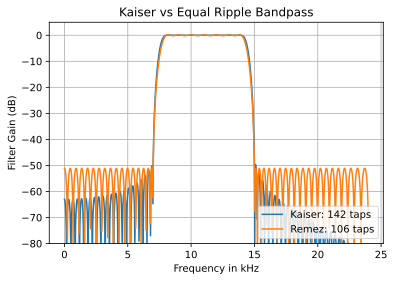

In [72]:
fir_d.freqz_resp_list([b_k_bp,b_r_bp],[[1],[1]],'dB',fs=48)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Bandpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k_bp),
        r'Remez: %d taps' % len(b_r_bp)),
       loc='lower right')
grid();

Perintah ini memanggil fungsi freqz_resp_list dari modul fir_design_helper untuk memplot respons frekuensi dari kedua filter FIR band-pass yang telah di rancang, kemudian menyesuaikan batas sumbu y, judul, label sumbu x dan y, serta menambahkan legenda dan grid.

Ini akan menghasilkan plot yang membandingkan respons frekuensi dari kedua filter dengan panjang tap yang berbeda.

# **A Design Example Useful for Interpolation or Decimation**

menggunakan fungsi fir_remez_lpf untuk merancang filter FIR low-pass. Di bawah ini adalah kode lengkapnya:

In [12]:
b_up = fir_d.fir_remez_lpf(3300, 4300, 0.5, 60, 96000)

meminta filter dengan frekuensi cutoff pada 4300 Hz, lebar pita stopband sebesar 3300 Hz, dan panjang filter maksimum 60. Panjang filter yang dihasilkan akan bervariasi tergantung pada metode yang digunakan.

In [11]:
mr_up = mrh.multirate_FIR(b_up)

mengimpor modul multirate_helper dengan alias mrh dan menggunakan fungsi multirate_FIR untuk memproses filter FIR yang di rancang sebelumnya dengan fungsi fir_remez_lpf.

Pertimbangkan konfigurasi pole-nol untuk filter orde tinggi ini

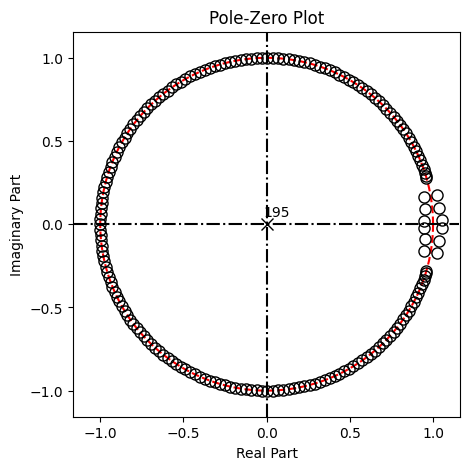

In [13]:
# Take a look at the pole-zero configuration of this very
# high-order (many taps) linear phase FIR
mr_up.zplane()

Dengan Perintah mr_up.zplane() digunakan untuk menampilkan konfigurasi pole-zero (polos dan nol) dari filter FIR yang telah dirancang. Memberikan representasi visual dari lokasi polos dan nol di dalam bidang kompleks.

Dengan memeriksa konfigurasi pole-zero, bisa untuk memahami karakteristik filter FIR secara lebih mendalam, seperti stabilitas, linearitas fase, dan respons frekuensinya. Ini juga dapat membantu dalam menganalisis kinerja filter dan memperbaiki masalah jika diperlukan.

Lihat keuntungan passband dan stopband

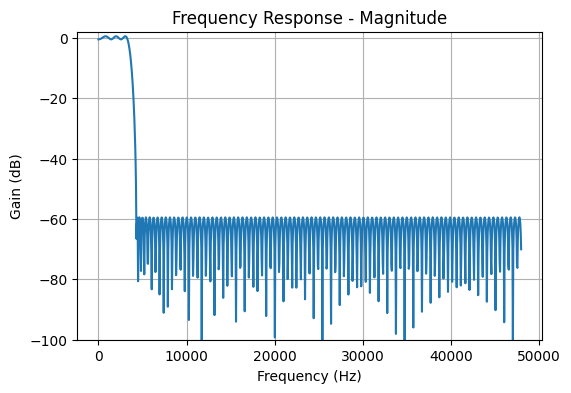

In [14]:
# Verify the passband and stopband gains are as expected
mr_up.freq_resp('db',96000)


Perintah mr_up.freq_resp('db',96000) digunakan untuk memverifikasi respons frekuensi dari filter FIR yang telah dirancang dalam bentuk dB pada frekuensi sampel 96 kHz. Ini akan memberikan representasi visual dari respons frekuensi filter FIR di seluruh rentang frekuensi.

Dengan memeriksa respons frekuensi, dapat memastikan bahwa filter berperilaku sesuai dengan harapan Anda, termasuk penguatan di jalur lewat (passband) dan penurunan penguatan di jalur henti (stopband). Ini penting untuk memverifikasi bahwa filter memenuhi spesifikasi desain yang diinginkan.

Lihat bahwa penundaan grup adalah nilai yang diharapkan dari (N taps-1)/2=98 sampel

Di sini, untuk menghitung panjang array b_up (jumlah koefisien filter), lalu mengurangi 1, dan kemudian membaginya dengan 2 :

In [15]:
new_var = (len(b_up-1))/2

98.0

Perhitungan (len(b_up) - 1) / 2 dilakukan untuk menentukan jarak dari titik tengah filter FIR ke tepi. Ini bermanfaat untuk menentukan karakteristik filter, seperti jendela dan linearitas fasa.

Dalam konteks ini, len(b_up) adalah panjang filter FIR b_up. Dengan mengurangi 1 dan kemudian membaginya dengan 2, kita mendapatkan jarak dari titik tengah filter FIR ke tepi.

Untuk memverifikasi bahwa desain FIR memiliki tundaan grup konstan, bisa melakukannya dengan memeriksa respons frekuensi dari tundaan grup.

Di bawah ini adalah cara untuk melakukannya dengan menggunakan objek mr_up yang telah Anda definisikan sebelumnya:

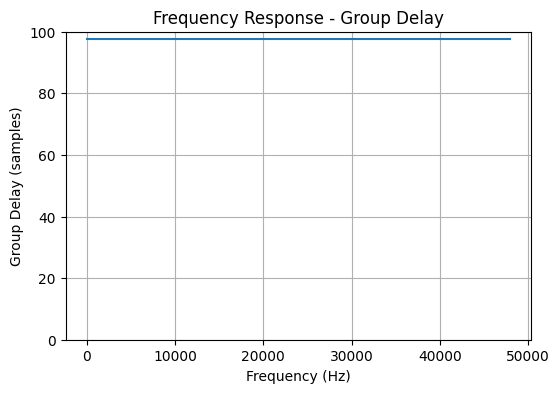

In [16]:
# Verify that the FIR design has constant group delay (N_taps - 1)/2 samples
mr_up.freq_resp('groupdelay_s',96000,[0,100])

Perintah ini akan menampilkan respons frekuensi dari tundaan grup dalam satuan sampel terhadap frekuensi dalam rentang 0 Hz hingga 100 Hz dengan menggunakan frekuensi sampling 96000 Hz.

# **Traditional IIR Filter Design using the Bilinear Transform**

Example: Lowpass Design Comparison

Menggunakan fungsi IIR_lpf dari modul iir_design_helper untuk merancang filter IIR low-pass dengan metode yang berbeda (Butterworth, Chebyshev Type I, Chebyshev Type II, dan Elliptic). Di bawah ini adalah kode lengkapnya:

In [19]:
fs = 48000
f_pass = 5000
f_stop = 8000
b_but,a_but,sos_but = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'butter')
b_cheb1,a_cheb1,sos_cheb1 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby1')
b_cheb2,a_cheb2,sos_cheb2 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby2')
b_elli,a_elli,sos_elli = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'ellip')


 Memilih frekuensi cutoff pada 5000 Hz dan frekuensi stop pada 8000 Hz, dengan lebar pita 0.5 dan redaman di stopband sebesar 60 dB. Filter IIR yang dihasilkan akan berbeda sesuai dengan metode yang di pilih.

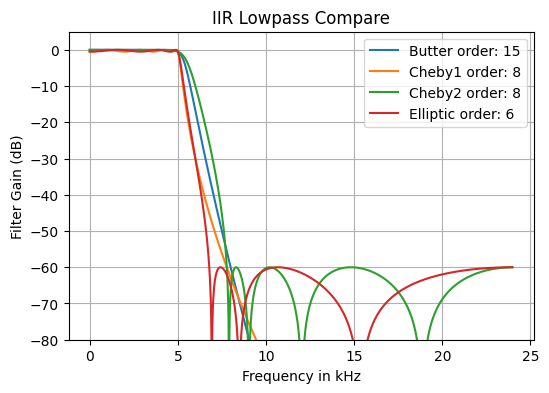

In [23]:
iir_d.freqz_resp_cas_list([sos_but, sos_cheb1, sos_cheb2, sos_elli], 'dB', fs=48)
plt.ylim([-80, 5])
plt.title(r'IIR Lowpass Compare')
plt.ylabel(r'Filter Gain (dB)')
plt.xlabel(r'Frequency in kHz')
plt.legend((r'Butter order: %d' % (len(a_but)-1),
            r'Cheby1 order: %d' % (len(a_cheb1)-1),
            r'Cheby2 order: %d' % (len(a_cheb2)-1),
            r'Elliptic order: %d' % (len(a_elli)-1)), loc='best')
plt.grid()
plt.show()


Kode yang tersebut berikan digunakan untuk menampilkan respons frekuensi dari filter IIR yang telah dirancang menggunakan berbagai metode (Butterworth, Chebyshev Type I, Chebyshev Type II, dan Elliptic). Setiap filter ditampilkan dalam plot yang sama untuk membandingkan kinerjanya.

Berikut penjelasan mengenai setiap bagian kode:

- iir_d.freqz_resp_cas_list([sos_but, sos_cheb1, sos_cheb2, sos_elli], 'dB', fs=48): Ini adalah pemanggilan fungsi freqz_resp_cas_list dari modul iir_design_helper. Fungsi ini digunakan untuk menghitung dan menampilkan respons frekuensi dari filter IIR dalam domain frekuensi.

- plt.ylim([-80, 5]): Ini adalah panggilan ke fungsi ylim dari modul matplotlib.pyplot untuk mengatur rentang sumbu y pada plot dari -80 hingga 5 dB.

- lt.title(r'IIR Lowpass Compare'): Ini adalah panggilan ke fungsi title untuk memberi judul pada plot.

- plt.ylabel(r'Filter Gain (dB)'): Ini adalah panggilan ke fungsi ylabel untuk memberi label sumbu y pada plot.

- plt.xlabel(r'Frequency in kHz'): Ini adalah panggilan ke fungsi xlabel untuk memberi label sumbu x pada plot.

- plt.legend((r'Butter order: %d' % (len(a_but)-1), r'Cheby1 order: %d' % (len(a_cheb1)-1), r'Cheby2 order: %d' % (len(a_cheb2)-1), r'Elliptic order: %d' % (len(a_elli)-1)), loc='best'): Ini adalah panggilan ke fungsi legend untuk menambahkan legenda ke plot. Setiap label legenda menyertakan urutan filter yang sesuai (order) berdasarkan panjang koefisien.

- plt.grid(): Ini adalah panggilan ke fungsi grid untuk menampilkan grid pada plot.

- plt.show(): Ini adalah panggilan ke fungsi show untuk menampilkan plot secara keseluruhan.

Dengan kode ini, dapat membandingkan respons frekuensi dari berbagai filter IIR yang telah dirancang dengan berbagai metode.

Selanjutnya plot konfigurasi pole-nol dari desain butterworth. Di sini kita menggunakan versi khusus ss.zplane yang bekerja dengan array sos 2D.

(15, 15)

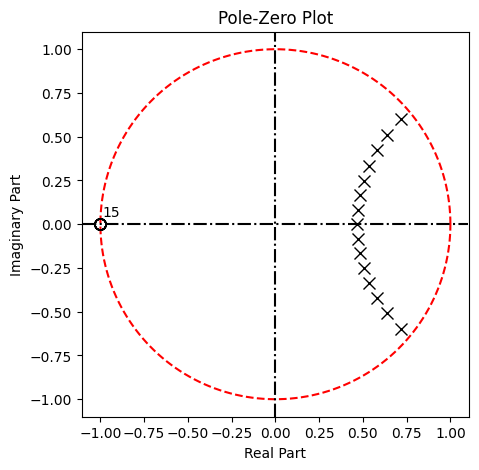

In [24]:
iir_d.sos_zplane(sos_but)

Kode iir_d.sos_zplane(sos_but) digunakan untuk menampilkan konfigurasi pole-zero dari desain filter Butterworth. Ini membantu dalam memvisualisasikan posisi pole dan zero dari filter tersebut dalam domain kompleks. Dengan memperhatikan posisi pole dan zero, kita dapat memahami karakteristik dan perilaku filter tersebut, seperti stabilitas dan respons frekuensinya. Ini juga membantu dalam menganalisis bagaimana filter akan merespons terhadap sinyal input dalam domain waktu dan frekuensi.

# **A Half-Band Filter Design to Pass up to  W/2when fs= 8 kHz**

In [25]:
# Elliptic IIR Lowpass
b_lp,a_lp,sos_lp = iir_d.IIR_lpf(1950,2050,0.5,80,8000.,'ellip')
mr_lp = mrh.multirate_IIR(sos_lp)

kode diatas menggunakan fungsi iir_d.IIR_lpf dari modul iir_design_helper untuk merancang filter IIR low-pass dengan metode Elliptic. Anda telah menentukan parameter-parameter seperti frekuensi cutoff, frekuensi stop, lebar pita, dan redaman di stopband.

Variabel b_lp, a_lp, dan sos_lp menyimpan koefisien filter yang dihasilkan. Kemudian, menggunakan koefisien tersebut untuk membuat objek multirate_IIR dari modul multirate_helper. Ini menunjukkan ketertarikan untuk menerapkan filter ini dalam konteks pemrosesan sinyal multirate, di mana sinyal diproses pada beberapa tingkat kecepatan sampel.

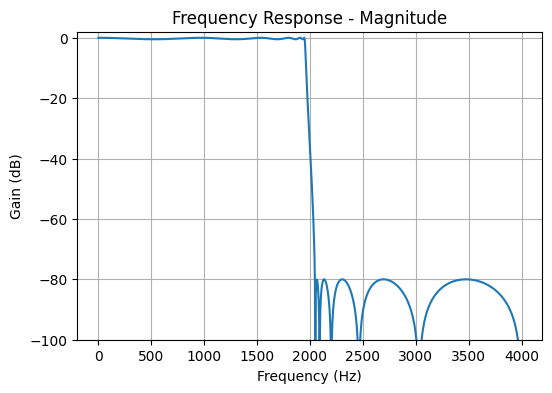

In [26]:
mr_lp.freq_resp('db',8000)

Dalam kode mr_lp.freq_resp('db',8000), menggunakan objek mr_lp yang merupakan instance dari multirate_IIR yang dibuat sebelumnya menggunakan koefisien filter. Lalu memanggil metode freq_resp dari objek mr_lp.

Fungsi freq_resp ini digunakan untuk menghitung respons frekuensi dari filter. Argumen pertamanya adalah mode, yang dalam kasus ini adalah 'db', yang menunjukkan bahwa respons frekuensi akan ditampilkan dalam skala desibel. Argumen kedua adalah frekuensi sampling, yang dalam kasus ini adalah 8000 Hz.

Jadi, kode ini digunakan untuk menghitung dan menampilkan respons frekuensi seperti grafik yang sudah ditampilkan diatas dari filter IIR dengan skala desibel pada frekuensi sampling 8000 Hz. Ini membantu untuk memahami bagaimana filter tersebut merespons terhadap berbagai frekuensi sinyal dalam domain frekuensi, yang berguna untuk analisis dan desain filter.

(-130.0, -30.0)

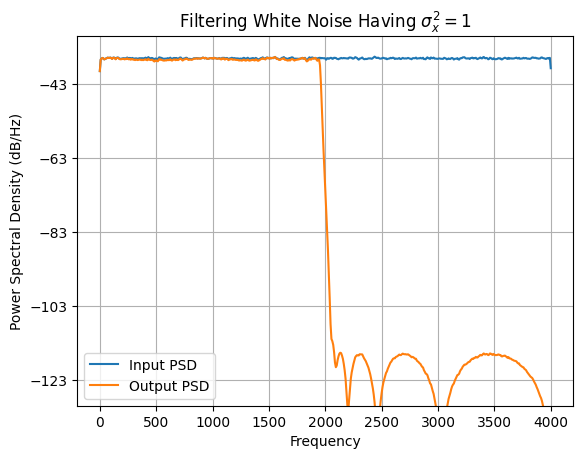

In [32]:
x = np.random.randn(1000000)
y = mr_lp.filter(x)
psd(x, 2**10, 8000)
psd(y, 2**10, 8000)
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')
legend(('Input PSD', 'Output PSD'), loc='best')
ylim([-130, -30])


Kode tersebut digunakan untuk melakukan beberapa tugas terkait pemrosesan sinyal:

Pembuatan Sinyal: Dengan menggunakan numpy.random.randn, kode tersebut membuat sinyal acak yang mengikuti distribusi normal (white noise) dengan panjang 1000000 sampel.

Filtering Sinyal: Kode tersebut menggunakan filter yang telah dirancang sebelumnya (mr_lp) untuk memfilter sinyal acak yang telah dibuat. Ini membantu dalam menerapkan filter yang telah dirancang ke sinyal aktual untuk melihat bagaimana filter tersebut mempengaruhi sinyal.

Analisis Spektral: Dengan menggunakan matplotlib.pyplot.psd, kode tersebut memplot spektrum daya (PSD) dari sinyal masukan dan keluaran. Ini membantu dalam melihat bagaimana filter mempengaruhi spektrum frekuensi dari sinyal, apakah ada penguatan atau penyaringan pada frekuensi tertentu.

Visualisasi: Dengan menggunakan fungsi title, legend, dan ylim dari modul matplotlib.pyplot, kode tersebut menambahkan judul, legenda, dan batasan sumbu pada plot untuk memberikan konteks visual yang lebih baik.

Jadi, secara keseluruhan, kode tersebut digunakan untuk memperagakan proses filterisasi sinyal dan menganalisis efeknya pada domain frekuensi menggunakan representasi PSD.

In [37]:
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

Expected PSD of -39.031 dB/Hz


Kode tersebut untuk mencetak nilai yang diharapkan PSD (Power Spectral Density) dalam unit dB/Hz.

# **Amplitude Response Bandpass Design**

Di sini kami mempertimbangkan desain bandpass FIR dan IIR untuk digunakan dalam demodulator SSB untuk menghilangkan potensi sinyal saluran yang berdekatan yang berada di kedua sisi pita frekuensi yang berjalan dari 23 kHz hingga 24 kHz.

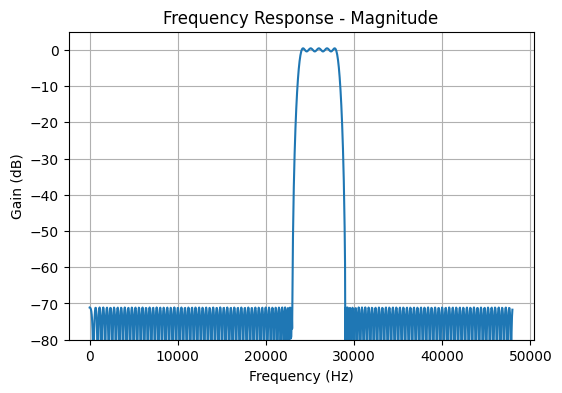

In [42]:
import matplotlib.pyplot as plt

b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)
plt.ylim([-80, 5])
plt.grid()
plt.show()


Kode tersebut digunakan untuk merancang dan memvisualisasikan respons frekuensi dari filter yang telah dirancang menggunakan metode FIR Remez untuk membangun sebuah bandpass filter. Visualisasi ini berguna untuk memahami karakteristik frekuensi dari filter yang telah dirancang, seperti pita frekuensi yang diperbolehkan atau ditolak, serta respon amplitudo di dalamnya.

Penjelasan dari setiap bagian:

- 'b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)': Ini adalah langkah untuk merancang filter FIR menggunakan metode FIR Remez dengan spesifikasi bandpass tertentu. Fungsi ini mengembalikan koefisien filter FIR yang diperlukan.

- 'fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)': Ini adalah langkah untuk memvisualisasikan respons frekuensi dari filter yang telah dirancang. Fungsi freqz_resp_list dari modul fir_design_helper digunakan untuk ini. Filter FIR yang dirancang diberikan sebagai masukan, dan opsi lain seperti mode ('dB' untuk respons dalam skala desibel) dan frekuensi sampling (fs) ditentukan.

- 'plt.ylim([-80, 5])': Ini adalah langkah untuk menetapkan batas sumbu y pada plot. Di sini, sumbu y dibatasi dari -80 hingga 5.

- 'plt.grid()': Ini adalah langkah untuk menampilkan grid pada plot, sehingga mempermudah dalam memahami respons frekuensi yang ditampilkan.

Kode tersebut secara keseluruhan digunakan untuk merancang, memvisualisasikan, dan menganalisis respons frekuensi dari filter FIR bandpass yang telah dirancang menggunakan metode FIR Remez.








Penundaan grup adalah datar (konstan) berdasarkan desain yang memiliki fase linier.

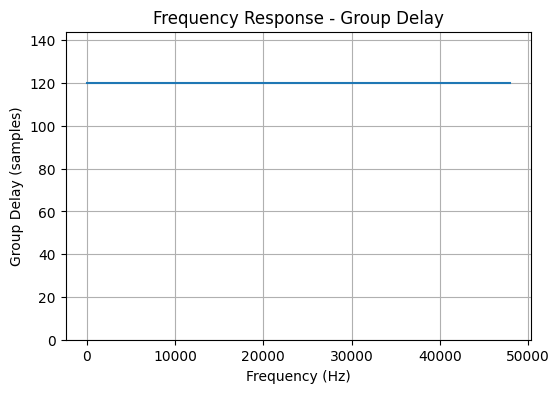

In [45]:
import matplotlib.pyplot as plt

b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)
plt.grid()
plt.show()


Kode tersebut digunakan untuk merancang sebuah filter FIR menggunakan metode FIR Remez dengan spesifikasi tertentu untuk membangun sebuah bandpass filter. Setelah filter tersebut dirancang, kode tersebut kemudian digunakan untuk memvisualisasikan respons group delay dari filter yang dirancang.

Penjelasan dari setiap kode:

- 'b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)': Ini adalah langkah untuk merancang filter FIR menggunakan metode FIR Remez dengan spesifikasi bandpass tertentu. Fungsi ini mengembalikan koefisien filter FIR yang diperlukan.

- 'fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)': Ini adalah langkah untuk memvisualisasikan respons group delay dari filter yang telah dirancang. Fungsi freqz_resp_list dari modul fir_design_helper digunakan untuk ini. Filter FIR yang dirancang diberikan sebagai masukan, dan opsi lain seperti mode ('groupdelay_s' untuk respons group delay) dan frekuensi sampling (fs) ditentukan.

- 'plt.grid()': Ini adalah langkah untuk menampilkan grid pada plot, sehingga mempermudah dalam memahami respons group delay yang ditampilkan.

kode tersebut secara keseluruhan digunakan untuk merancang, memvisualisasikan, dan menganalisis respons group delay dari filter FIR bandpass yang telah dirancang menggunakan metode FIR Remez.

Bandingkan desain FIR dengan desain elips:

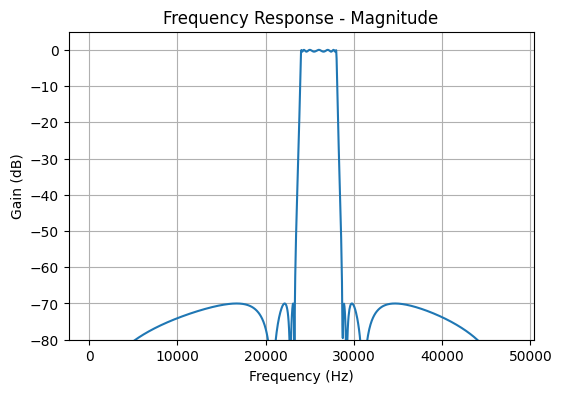

In [47]:
import matplotlib.pyplot as plt

b_rec_bpf2,a_rec_bpf2,sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                   0.5,70,96000,'ellip')
with np.errstate(divide='ignore'):
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)
plt.ylim([-80, 5])
plt.grid()
plt.show()


Kode tersebut digunakan untuk merancang sebuah filter IIR (Infinite Impulse Response) menggunakan metode IIR Butterworth dengan spesifikasi tertentu untuk membangun sebuah bandpass filter. Setelah filter tersebut dirancang, kode tersebut kemudian digunakan untuk memvisualisasikan respons frekuensi dari filter yang dirancang.

Penjelasan dari setiap bagian:

- 'b_rec_bpf2,a_rec_bpf2,sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,0.5,70,96000,'ellip')': Ini adalah langkah untuk merancang filter IIR menggunakan metode IIR Butterworth dengan spesifikasi bandpass tertentu. Fungsi ini mengembalikan koefisien filter IIR yang diperlukan.

- 'with np.errstate(divide='ignore')': Ini adalah langkah untuk menangani pembagian oleh nol yang dapat terjadi saat melakukan operasi logaritma dalam perhitungan respons frekuensi.

- 'iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)': Ini adalah langkah untuk memvisualisasikan respons frekuensi dari filter yang telah dirancang. Fungsi freqz_resp_cas_list dari modul iir_design_helper digunakan untuk ini. Filter IIR yang dirancang diberikan sebagai masukan, dan opsi lain seperti mode ('dB' untuk respons dalam skala desibel) dan frekuensi sampling (fs) ditentukan.

- 'plt.ylim([-80, 5])': Ini adalah langkah untuk menentukan batas sumbu y pada plot respons frekuensi.

- 'plt.grid()': Ini adalah langkah untuk menampilkan grid pada plot, sehingga mempermudah dalam memahami respons frekuensi yang ditampilkan.

Kode tersebut secara keseluruhan digunakan untuk merancang, memvisualisasikan, dan menganalisis respons frekuensi dari filter IIR bandpass yang telah dirancang menggunakan metode IIR Butterworth.

Elips orde tinggi ini memiliki respons amplitudo ketat yang bagus untuk koefisien minimal, tetapi penundaan grup sangat buruk:

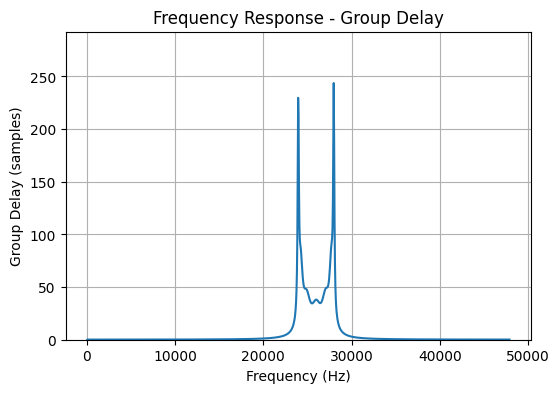

In [49]:
import matplotlib.pyplot as plt

with np.errstate(divide='ignore', invalid='ignore'): #manage singularity warnings
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)
#ylim([-80, 5])
plt.grid()
plt.show()

Kode ini digunakan untuk memvisualisasikan group delay dari filter IIR yang telah dirancang sebelumnya menggunakan metode IIR Butterworth.

Penjelasan singkat dari setiap bagian kode:

- 'with np.errstate(divide='ignore', invalid='ignore')': : Ini adalah langkah untuk menangani peringatan singularity yang mungkin terjadi selama operasi, seperti pembagian oleh nol atau hasil yang tidak valid. Dalam kasus ini, kita mengabaikan peringatan tersebut karena dapat muncul saat menghitung group delay.

- 'iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)': Ini adalah langkah untuk memvisualisasikan group delay dari filter. Fungsi freqz_resp_cas_list dari modul iir_design_helper digunakan untuk ini. Filter IIR yang telah dirancang diberikan sebagai masukan, dan mode 'groupdelay_s' digunakan untuk memperoleh respons dalam bentuk group delay.

- 'plt.grid()': Ini adalah langkah untuk menampilkan grid pada plot, sehingga mempermudah dalam memahami respons group delay yang ditampilkan.

- 'plt.show()': Ini adalah langkah untuk menampilkan plot.

kode tersebut digunakan untuk memvisualisasikan group delay dari filter IIR yang sudah dirancang sebelumnya.